<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 11** - Oct 1, 2015

- Classification problems
- Nearest Neighbors (NN, $k$-NN)
- Naive Bayes Classifier

<hr/>

<h1><font color="darkblue">Classification</font></h1>

- Based on a **training set** of labeled points, assign class labels to unknown vectors in the **query set**.  

> **Training set**

>$T = \big\{ (x_i, C_i) \big\}$ where $x_i\in \mathbb{R}^d$ and $C_i$ is the known class membership 

> **Query set**

>$Q = \big\{ x_i \big\}$ where $x_i\in \mathbb{R}^d$ 

> For example,
> blood tests ($x$) and sick/healty ($C$) - we want to predict if a new patient is sick based on the available measurements

- Similar to regression but with discrete categories to classify into...

### Classification Methods

- $k$-NN
- Naive Bayes
- Linear Discriminant Analysis
- Logistic regression
- Decisions trees
- Random forests
- Support Vector Machines

### The Iris Dataset

We'll use this data set available in [scikit-learn](http://scikit-learn.org/stable/index.html), see [this](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) page for details

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(150L, 4L)
data
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
target
[0 0 0 0 0]


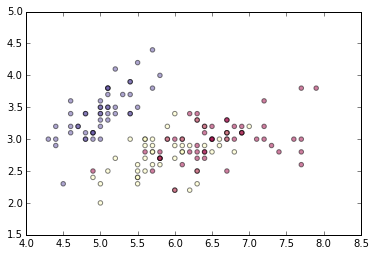

In [8]:
# load data
from sklearn import datasets
iris = datasets.load_iris()

print iris.data.shape

# have a peek
print 'data\n', iris.data[:5]
print 'target\n', iris.target[:5]

# two features
plt.scatter( iris.data[:,0], iris.data[:,1], 
    c=iris.target, cmap=cm.Spectral_r, alpha=0.5);

if False:
    figure()
    plt.scatter( iris.data[:,1], iris.data[:,2], 
        c=iris.target, cmap=cm.Spectral_r, alpha=0.5);

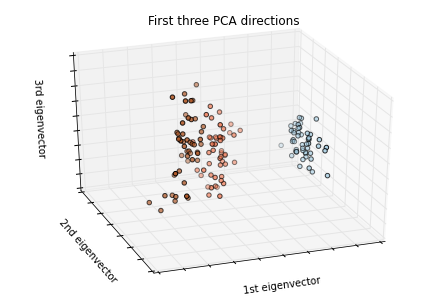

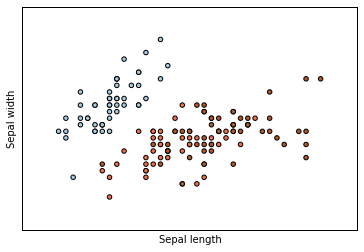

In [9]:
# http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(6, 4))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(6, 4))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


### Nearest Neighbor


- Assign label or value of nearest neighbor (NN) in the training set

> Simple but powerful

> <img src=https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg width=200>


In [22]:
# naive and very slow nearest neighbor search
# for illustration purposes only...
import datetime as dt
start = dt.datetime.now()

X = iris.data[:,:]
y = iris.target

print 'Unique classes', np.unique(iris.target)

y_pred = -1 * np.ones(y.size)

# loop on query set
for i in arange(y.size): 
    
    d2min = 1e99 # something large
    
    # loop on training set
    for j in arange(y.size):
        if i != j:               # leave one out
            d = X[i,:] - X[j,:]  # diff vector
            d2 = d.dot(d)        # its length squared
            if d2 < d2min:       # check if closer
                d2min = d2       # save if it is
                y_pred[i] = y[j]

print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0] ,(y != y_pred).sum()))

print 'Elapsed time', dt.datetime.now() - start

# write a faster version of this

Unique classes [0 1 2]
Number of mislabeled points out of a total 150 points : 6
Elapsed time 0:00:00.342000


### $k$ Nearest Neighbors

- Assign label or value based $k$ nearest neighbors ($k$-NN) in the training set

> For example, the most frequent "vote" <br/> possibly with weighting


> <img src=https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg width=200>

- Using $k$ instead of a distance cutoff helps with large density contrasts



In [29]:
from sklearn import neighbors

X = iris.data[:,:2] # using only 2 features for each
y = iris.target

start = dt.datetime.now()
clf = neighbors.KNeighborsClassifier(10)
y_pred = clf.fit(X, y).predict(X)

print "Elapsed time", dt.datetime.now()-start
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))

Elapsed time 0:00:00
Number of mislabeled points out of a total 150 points : 23


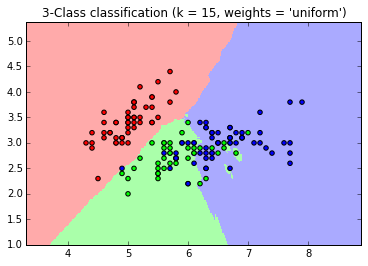

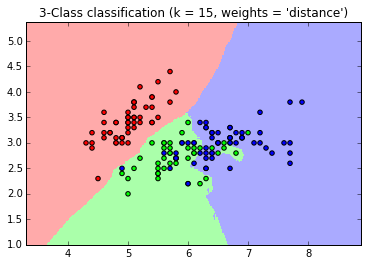

In [33]:
# using a mesh to evaluate the classifier in many places

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

### Other examples

More [exercises](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#examples-using-sklearn-neighbors-kneighborsclassifier) such as classification of [digits](http://scikit-learn.org/stable/auto_examples/exercises/digits_classification_exercise.html) are available at http://scikit-learn.org

### Meaningful Distance?

- Need a distance function

> E.g., use Euclidean distance in $\mathbb{R}^d$

- Problem with different features and units

> In practice **centering** and **scaling** often helps <br/>
> Arguably, black art...


### Curse of Dimensionality

- Everybody is lonely in high dimensions

> Surface / Volume ratio grows <br/>as function of $d$ dimension


### Naive Bayes Classifier

- Using Bayes' rule to infer discrete classes $C_k$ for a given $\boldsymbol{x}$ set of features

>$\displaystyle P(C_k|\boldsymbol{x}) = \frac{1}{Z}\ \pi(C_k)\,{\cal{}L}_{\boldsymbol{x}}(C_k)$ 


- Naively assuming the features are independent 

>$\displaystyle {\cal{}L}_{\boldsymbol{x}}(C_k) = \prod_i^d p(x_i|C_k)$ 


### Naive Bayes: Learning

- Say we for Gaussian likelihoods, we simply estimate the sample mean and variance of all features for each class $k$

>$\displaystyle p(x_i|C_k) = G(x_i;\mu_k, \sigma^2_k)$

- We have to also pick some prior for the classes

> Using uniform or based on frequency of points in training set



### Naive Bayes: Estimation

- Look for maximum of the posterior


>$\displaystyle \hat{k} =  \mathrm{arg}\max_k \left[ \pi_k \prod_i^d G(x_i;\mu_k, \sigma^2_k)\right]$ 


In [37]:
# run sklearn's version
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)

print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


In [35]:
# unique known classes in training set
classes = np.unique(iris.target)
print 'There are %d classes:' % len(classes), classes

# calc feature means and variances for each class
param = dict() # we save them in this dictionary
for k in classes:
    members = (iris.target == k) # boolean array
    num = members.sum()    # True:1, False:0
    prior = num / float(iris.target.size)
    X = iris.data[members,:] # slice out members
    mu = X.mean(axis=0)      # calc mean
    # FIXME
    var = (X*X).sum(axis=0) / (X[0,:].size-1)
    param[k] = (num, prior, mu, var) # save results
    if True: print k, mu, var

There are 3 classes: [0 1 2]
0 [ 5.006  3.418  1.464  0.244] [ 419.69666667  197.08333333   36.21333333    1.18      ]
1 [ 5.936  2.77   4.26   1.326] [ 591.62        129.49        306.06666667   29.94333333]
2 [ 6.588  2.974  5.552  2.026] [ 729.96666667  149.11        518.72         69.64333333]


In [36]:
# init predicted values
k_pred = -1 * ones(iris.target.size)

# evaluate posterior for each point and find maximum
for i in range(iris.target.size):
    pmax, kmax = -1, None   # initialize to nonsense values
    for k in classes:
        num, prior, mu, var = param[k]
        diff = iris.data[i,:] - mu
        d2 = diff*diff / var / 2 
        p = prior * np.exp(-d2.sum()) # ignoring prefactors
        if p > pmax:
            pmax = p
            kmax = k
    k_pred[i] = kmax

print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != k_pred).sum()))

Number of mislabeled points out of a total 150 points : 10
